In [1]:
import random

def toss_coin(player_move, verbose=False):
    coin = 1
    # Computer toss a coin
    move1 = random.choice([True,False])
    coin = 0 if move1 else 1
    if verbose:
        print("电脑翻了硬币" if move1 else "电脑没有翻硬币")
    
    coin = coin if player_move else (1 - coin)
    if verbose:
        print("你翻了硬币" if player_move else "你没有翻硬币")
    
    # Computer flip the coin again
    move2 = random.choice([True,False])
    coin = coin if move2 else (1 - coin)
    if verbose:
        print("电脑翻了硬币" if move2 else "电脑没有翻硬币\n\n")
    
    if verbose:
        print("硬币是正面，电脑赢了" if coin else "硬币是反面，你赢了")
    
    return coin

toss_coin(True, True)

电脑没有翻硬币
你翻了硬币
电脑没有翻硬币


硬币是反面，你赢了


0

电脑赢了508次，你赢了492次


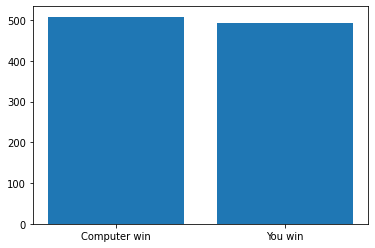

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

computer = 0
player = 0

for i in range(1000):
    player_move = random.choice([True,False])
    if toss_coin(player_move) == 1:
        computer += 1
    else:
        player += 1
        
x = np.arange(2)
plt.bar(x, height=[computer, player])
plt.xticks(x, ['Computer win','You win'])
print("电脑赢了%s次，你赢了%s次" % (computer, player))

In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, BasicAer
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from ipywidgets import interact

In [44]:
backend = BasicAer.get_backend('qasm_simulator') # define the backend

def quantum_toss_coin(player_move, verbose=False):
    # create the quantum circuit with the chosen coin moves
    q = QuantumRegister(1) # create a quantum register with one qubit
    # create a classical register that will hold the results of the measurement
    c = ClassicalRegister(1) 
    qc = QuantumCircuit(q, c) # creates the quantum circuit
    

    # 1. move of A
    qc.h(q[0]) 

    # 1. move of B 
    if player_move: qc.x(q[0])
    else: qc.i(q[0])

    # 2. move of A
    qc.h(q[0]) 

    qc.measure(q, c) # Measure the qubits
    
    job = execute(qc, backend, shots=200)
    result = job.result()
    counts = result.get_counts(qc)
    

    def who_wins(counts):
        if len(counts)==1 :
            coin = 1 if ("0" in counts) else 0
            if verbose: print('获胜的是', '电脑' if coin == 1 else '玩家')
        else:
            count0=counts["0"]
            count1=counts["1"]
            print('硬币处于叠加态')
            print('电脑获胜的概率是',  "%.1f%%" % (100.*count0/(count0+count1)))
            print('你获胜的概率是',  "%.1f%%" % (100.*count1/(count0+count1)))
        return coin

    coin = who_wins(counts)
    
    return qc, coin

获胜的是 电脑


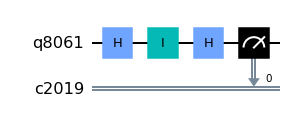

In [45]:
qc, coin = quantum_toss_coin(False, True)
qc.draw(output='mpl') # plot the circuit

电脑赢了1000次，你赢了0次


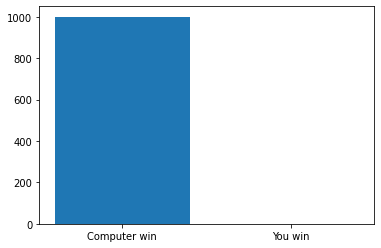

In [46]:
import random
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
computer = 0
player = 0

for i in range(1000):
    player_move = random.choice([True,False])
    qc, coin = quantum_toss_coin(player_move)
    if coin == 1:
        computer += 1
    else:
        player += 1
        
x = np.arange(2)
plt.bar(x, height=[computer, player])
plt.xticks(x, ['Computer win','You win'])
print("电脑赢了%s次，你赢了%s次" % (computer, player))